In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# 🎲 Homework 6: Probability and Estimators
## Due Date: Thursday, April 10th, 11:59 PM PDT

**‼️ Note: There is also a written portion of this HW! Be sure to complete both this notebook and the written assignment.**

You must submit this assignment to Gradescope by the on-time deadline, Thursday, April 10th, at 11:59 PM. Please read the syllabus for the Slip Day policy. No late submissions beyond what is outlined in the Slip Day policy will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance (TAs need to sleep, after all!).

This is part of a two-part assignment. After completing this part ("Homework 6 Coding"), also remember to complete the "Homework 6 (Statistics)" assignment, which will be about deriving the mathematical aspects of random variables and estimators to help you in upcoming statistics courses during your time at Berkeley.

Please read the instructions carefully when submitting your work to Gradescope. 


## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

## Introduction

In this homework, we will explore a dataset of the 2022 U.S. News & World Report rankings for liberal arts colleges.
The dataset in this HW is a simplified version of the [original data source](https://andyreiter.com/datasets/).

While working on this notebook, you will gain experience with the following:
* Bootstrap sampling,
* The bias-variance tradeoff and decomposition, and
* Multicollinearity in features.

## Grading
Grading is broken down into auto-graded answers and free responses. 

For auto-graded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question. 

### Score breakdown

Question | Manual | Points
--- |---| ---
1a| No | 2
1b| No | 3
1c| Yes | 3
1d| Yes | 2
1e| Yes | 1
2a| No | 3
2b| Yes |3
2c| Yes | 1
3a| No | 2
3b| No | 2
3c| No | 2
3d(i)| Yes | 1.5
3d(ii)| Yes | 1.5
4a| No | 2
4b| Yes | 2
Total | 8 | 31

If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). 

In [2]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.precision', 3)

<br/>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 📈 Question 1: Exploratory Data Analysis

Let's perform some initial EDA to identify trends and patterns in the college ranking dataset.

In [3]:
# Run this cell to load the data; no further action is needed.
college_data = pd.read_csv('data/2022_college_rankings.csv')
college_data.head(5)

,Institution,Type,Overall Score (0-100),Peer Assessment Score (1-5),Graduation and retention rank,Predicted 6yr graduation rate,Actual 6yr graduation rate,Pell gradrate,Social Mobility Rank,Percent of classes under 20,Percent of classes of 50 or more students,Student Excellence rank,First year students in top 10% of high school class,Acceptance rate,Financial resources rank,Average alumni giving rate
0,Williams College (MA),private,100,4.7,1,95%,96%,96%,98.0,84%,1%,1,95%,15%,2.0,47%
1,Amherst College (MA),private,98,4.6,2,92%,95%,93%,38.0,80%,2%,5,85%,12%,5.0,42%
2,Swarthmore College (PA),private,94,4.6,2,92%,97%,98%,135.0,76%,1%,3,93%,9%,6.0,31%
3,Pomona College (CA),private,93,4.5,6,92%,94%,91%,80.0,78%,0.20%,3,90%,9%,8.0,23%
4,Wellesley College (MA),private,92,4.5,14,92%,94%,95%,98.0,71%,0.20%,8,85%,20%,8.0,40%


The granularity of the dataset is an individual **college**; each row corresponds to metrics, ratings, and features of one college in the U.S.

Here are the columns in the dataset:
* `Institution`: The name of the college
* `Type`: Whether the college is `'private'` or `'public'`
* `Overall Score (0-100)`: The score computed by U.S. News & World Report to generate the ranking. **This is our outcome variable.**
* The remaining columns contain features that are related to each college's overall score. 

We can use `college_data.info()` and `college_data.describe()` to see various statistics about the features of the provided college ranking data. Do any particular statistics stand out to you? Which might be useful when modeling?

**Note:** This isn't a question, so it's not worth any points. This is just food for thought as you start to explore the dataset.

In [4]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Institution                                          167 non-null    object 
 1   Type                                                 167 non-null    object 
 2   Overall Score (0-100)                                167 non-null    int64  
 3   Peer Assessment Score (1-5)                          167 non-null    float64
 4   Graduation and retention rank                        167 non-null    int64  
 5   Predicted 6yr graduation rate                        167 non-null    object 
 6   Actual 6yr graduation rate                           167 non-null    object 
 7   Pell gradrate                                        154 non-null    object 
 8   Social Mobility Rank                                 161 non-null    f

In [5]:
college_data.describe()

,Overall Score (0-100),Peer Assessment Score (1-5),Graduation and retention rank,Social Mobility Rank,Student Excellence rank,Financial resources rank
count,167.000,167.000,167.000,161.000,167.000,167.000
mean,62.012,3.240,83.281,110.491,86.341,88.551
std,14.977,0.608,50.093,59.655,53.451,53.912
min,40.000,2.200,1.000,3.000,1.000,1.000
25%,49.500,2.750,42.000,67.000,41.000,42.000
50%,59.000,3.100,84.000,115.000,84.000,85.000
75%,72.000,3.600,121.000,158.000,128.500,127.000
max,100.000,4.700,191.000,212.000,212.000,222.000


You may have observed that several features in the dataset are not shown when viewing with the `describe()` method. This is because those features are non-numeric. For example, some features are in the string format `"XX%"`.

Before we can fit a linear model accounting for all features in the dataset, we have to convert all features to a numeric representation.

<br>

---

### Question 1a

Create a new `DataFrame` `cleaned_college_data` with the following changes:

- For each column containing at least one missing value, add a new Boolean column that is `True` when the column value is missing, and `False` when the column value is not missing.
    - For example, if there were a column containing the values `1, 2, NaN`, we would add a column containing the values `False, False, True`.
    - If the original column name is `COLUMN`, the added column name should be `COLUMN_missing`. 

**Hint**: Use a `for` loop to iterate over the existing column names. You may find the `any()` function [(documentation)](https://docs.python.org/3/library/functions.html#any) useful.


In [6]:
cleaned_college_data = college_data.copy()
for col in college_data.columns:
    if college_data[col].isna().any():  
        cleaned_college_data[col + '_missing'] = college_data[col].isna()


In [7]:
grader.check("q1a")

q1a results: All test cases passed!

<br>

---

### Question 1b

Now, we will convert all non-numeric columns of `cleaned_college_data` into numbers. Additionally, we will create some new columns to encode additional information.

To do so, complete the following tasks **in the order they are listed**:
1. Consider the columns that contain the `'%'` symbol in any entry. Convert these columns from a string representation into the floating point number preceding `'%'`.
    - For example, the string `"96.4%"` should be converted into floating point number `96.4`.
2. Create a column called `"Is Public"` where the value is `1` if the row's college is public and `0` if the row's college is private.
3. Create a column called `"Is Private"` where the value is `1` if the row's college is private and `0` if the row's college is public.
4. Remove the `"Type"` and `"Institution"` columns.
5. Replace all `NaN` values in the data with the mean of their respective column.

**Hint**:
- `pd.Series.fillna()` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html) may come in handy.
- You can select all string columns in a `DataFrame` object `df` with `df.select_dtypes(include=['object'])`[(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html). Recall that strings are of the `object` type.

In [8]:
for col in cleaned_college_data.select_dtypes(include=['object']).columns:
    if cleaned_college_data[col].astype(str).str.contains('%').any():
        cleaned_college_data[col] = cleaned_college_data[col].str.rstrip('%').astype(float)

cleaned_college_data['Is Public'] = (cleaned_college_data['Type'] == 'public').astype(int)
cleaned_college_data['Is Private'] = (cleaned_college_data['Type'] == 'private').astype(int)
cleaned_college_data = cleaned_college_data.drop(columns=['Type', 'Institution'])
cleaned_college_data = cleaned_college_data.fillna(cleaned_college_data.mean(numeric_only=True))

cleaned_college_data

,Overall Score (0-100),Peer Assessment Score (1-5),Graduation and retention rank,Predicted 6yr graduation rate,Actual 6yr graduation rate,Pell gradrate,Social Mobility Rank,Percent of classes under 20,Percent of classes of 50 or more students,Student Excellence rank,...,Financial resources rank,Average alumni giving rate,Pell gradrate_missing,Social Mobility Rank_missing,Percent of classes under 20_missing,Percent of classes of 50 or more students_missing,First year students in top 10% of high school class_missing,Average alumni giving rate_missing,Is Public,Is Private
0,100,4.7,1,95.0,96.0,96.00,98.0,84.0,1.0,1,...,2.0,47.000,False,False,False,False,False,False,0,1
1,98,4.6,2,92.0,95.0,93.00,38.0,80.0,2.0,5,...,5.0,42.000,False,False,False,False,False,False,0,1
2,94,4.6,2,92.0,97.0,98.00,135.0,76.0,1.0,3,...,6.0,31.000,False,False,False,False,False,False,0,1
3,93,4.5,6,92.0,94.0,91.00,80.0,78.0,0.2,3,...,8.0,23.000,False,False,False,False,False,False,0,1
4,92,4.5,14,92.0,94.0,95.00,98.0,71.0,0.2,8,...,8.0,40.000,False,False,False,False,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,42,2.4,153,63.0,60.0,44.00,122.0,78.0,0.0,139,...,161.0,20.273,False,False,False,False,False,True,0,1
163,41,2.4,163,69.0,56.0,71.87,106.0,72.0,1.0,101,...,85.0,9.000,True,False,False,False,False,False,0,1
164,40,2.9,174,61.0,50.0,42.00,80.0,73.0,0.0,105,...,194.0,6.000,False,False,False,False,False,False,0,1
165,40,2.4,191,71.0,32.0,33.00,67.0,87.0,0.0,161,...,19.0,33.000,False,False,False,False,True,False,0,1


In [9]:
grader.check("q1b")

q1b results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---

### Question 1c

Linear models are sensitive to multicollinearity among the columns of the design matrix. So, let's determine the extent of multicollinearity in the college rankings dataset.

In the following cell, we provide you with `arranged_cleaned_college_data`, which is a copy of `cleaned_college_data` containing just a subset of the columns arranged in a particular order. 

Create a visualization that shows the pairwise correlation between each combination of columns in `arranged_cleaned_college_data`. 

- For 2-D visualizations, consider the `sns.heatmap()` [documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html). 

- For full credit, title your plot, and set `annot=True`. This makes the plot easier to interpret.

- You may find your plot easier to read with a different color scale. For example, try including `cmap="coolwarm"` inside of `sns.heatmap()`.

**Hint**: Your plot should show $10 \times 10$ values corresponding to the [pairwise correlations](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) of the selected columns in `arranged_cleaned_college_data`:
```
['Overall Score (0-100)', 
'Peer Assessment Score (1-5)', 
'Predicted 6yr graduation rate',
'Actual 6yr graduation rate', 
'Graduation and retention rank', 
'Student Excellence rank',
'Acceptance rate', 
'Financial resources rank', 
'Is Public', 
'Is Private']
```

In [10]:
# Running this cell helps you get a subset of cleaned_college_data with the above columns
arranged_cleaned_college_data = cleaned_college_data[
    ['Overall Score (0-100)', 
     'Peer Assessment Score (1-5)', 
     'Predicted 6yr graduation rate',
     'Actual 6yr graduation rate', 
     'Graduation and retention rank', 
     'Student Excellence rank',
     'Acceptance rate', 
     'Financial resources rank', 
     'Is Public', 
     'Is Private']
]

Your output figure should look similar to the following example:

<center><img src = "images/heatmap.png" width = "600"></center>

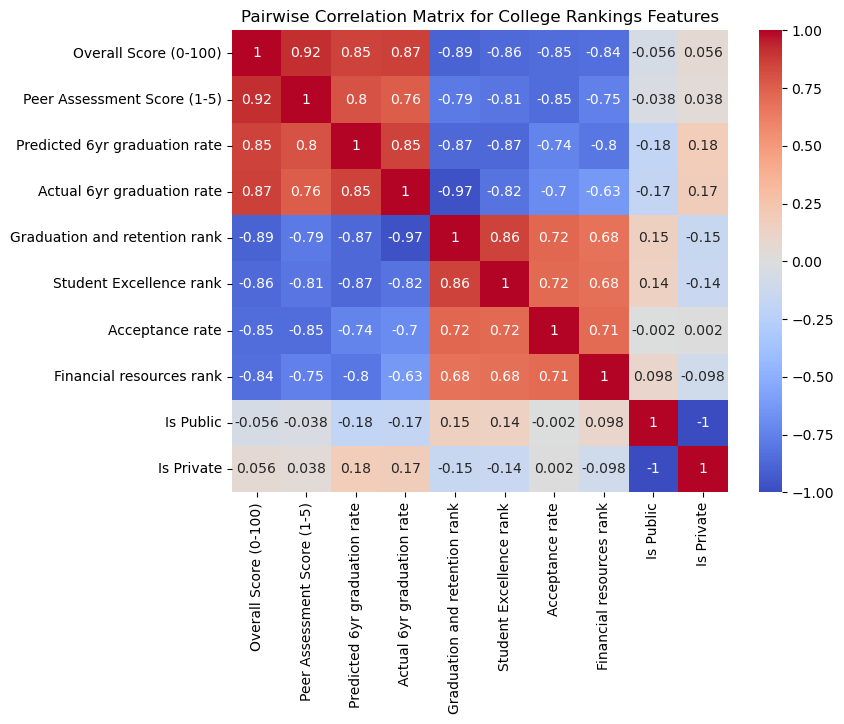

In [11]:
corr_matrix = arranged_cleaned_college_data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap="coolwarm")

ax.set_title("Pairwise Correlation Matrix for College Rankings Features")

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---

### Question 1d

Do you notice any patterns in the plot from part (c)? What might explain these patterns? Comment and hypothesize on at least two patterns you notice.

Here are some example questions to ponder:

1. Why do some feature-pairs have correlations of $\pm 1$? Is this a problem?
2. What does the correlation between pairs of features (i.e., graduation-related statistics) look like? Is the magnitude of any of the correlations problemtatically close to 1?
3. Are any features particularly strong predictors of the outcome? If so, why do you think this is the case?
4. Do any features seem potentially redundant? In other words, do you suspect that any features provide similar information about the outcome as other features?


When I looked at the heatmap, one thing that stood out right away was how strongly some of the graduation-related stats were correlated — like predicted graduation rate, actual graduation rate, and peer assessment score. They all had really high positive correlations with the overall score, which makes sense. If a school is good at graduating students and is well-reviewed by peers, it's probably going to have a higher overall ranking. That said, those features are also really similar to each other, so there might be some redundancy going on.

Another thing I noticed was that the rank-related features, like "graduation and retention rank" and "student excellence rank," had strong negative correlations with the overall score. At first, that might seem odd, but then I remembered that in rankings, lower is better — so a school ranked #1 in retention would likely have a high overall score. It just reflects the fact that better-ranked schools perform better overall.

One last thing: "Is Public" and "Is Private" were perfectly negatively correlated, which makes sense since they’re basically just two sides of the same coin. You’d probably want to drop one of them when building a model to avoid issues from perfect redundancy.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---
### Question 1e
If we tried to fit a linear regression model with an intercept term using all features in `cleaned_college_data`, we might run into some problems when fitting our model.
The Data 100 staff suggests that we perform the following operation to the `DataFrame` before fitting a model:

In [12]:
cleaned_college_data

,Overall Score (0-100),Peer Assessment Score (1-5),Graduation and retention rank,Predicted 6yr graduation rate,Actual 6yr graduation rate,Pell gradrate,Social Mobility Rank,Percent of classes under 20,Percent of classes of 50 or more students,Student Excellence rank,...,Financial resources rank,Average alumni giving rate,Pell gradrate_missing,Social Mobility Rank_missing,Percent of classes under 20_missing,Percent of classes of 50 or more students_missing,First year students in top 10% of high school class_missing,Average alumni giving rate_missing,Is Public,Is Private
0,100,4.7,1,95.0,96.0,96.00,98.0,84.0,1.0,1,...,2.0,47.000,False,False,False,False,False,False,0,1
1,98,4.6,2,92.0,95.0,93.00,38.0,80.0,2.0,5,...,5.0,42.000,False,False,False,False,False,False,0,1
2,94,4.6,2,92.0,97.0,98.00,135.0,76.0,1.0,3,...,6.0,31.000,False,False,False,False,False,False,0,1
3,93,4.5,6,92.0,94.0,91.00,80.0,78.0,0.2,3,...,8.0,23.000,False,False,False,False,False,False,0,1
4,92,4.5,14,92.0,94.0,95.00,98.0,71.0,0.2,8,...,8.0,40.000,False,False,False,False,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,42,2.4,153,63.0,60.0,44.00,122.0,78.0,0.0,139,...,161.0,20.273,False,False,False,False,False,True,0,1
163,41,2.4,163,69.0,56.0,71.87,106.0,72.0,1.0,101,...,85.0,9.000,True,False,False,False,False,False,0,1
164,40,2.9,174,61.0,50.0,42.00,80.0,73.0,0.0,105,...,194.0,6.000,False,False,False,False,False,False,0,1
165,40,2.4,191,71.0,32.0,33.00,67.0,87.0,0.0,161,...,19.0,33.000,False,False,False,False,True,False,0,1


In [13]:
# You must run this cell to achieve pass the public tests for later questions.
cleaned_college_data = cleaned_college_data.drop('Is Private', axis=1)

Describe the reasoning behind this operation. What problem(s) do we avoid by removing the `Is Private` column from the model fitting process?

We remove the Is Private column because it's perfectly negatively correlated with the Is Public column. Since every college is either public or private, including both in a linear regression model would create what's called perfect multicollinearity — basically, one column is completely predictable from the other.

This causes problems during model fitting because linear regression tries to assign a unique coefficient to each feature. But if two features are perfectly dependent on each other, the math behind the model can't figure out how to separate their individual effects — leading to unstable or meaningless coefficient values.

By removing one of the two (in this case, Is Private), we keep the useful information but avoid that multicollinearity issue. The model can still understand whether a school is public or private, based on the remaining column.

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## 🏗️ Question 2: Constructing a Preliminary College Ranking Model

In this question, you will fit a linear regression model to predict the U.S. News liberal arts college scores based on college metrics. Later, we will investigate the bias, variance, and observational noise of this model.

<br>

---

### Question 2a

Train an `sklearn` OLS model that predicts each college's overall score using all of the other columns in `cleaned_college_data`. Include an intercept term in the model.

Use `train_test_split()` [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to evaluate your model's RMSE on a held-out test set containing 33% of the college data; call the resulting splits `X_train`, `X_test`, `Y_train`, and `Y_test`.

You can instantiate your linear regression model using `lm.LinearRegression` [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**Note**: To pass the autograder, make sure to include `random_state=42` in your call to `train_test_split()` to generate a reproducible data split ([documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [14]:
# Create train/test sets
X = cleaned_college_data.drop(columns=['Overall Score (0-100)'])
Y = cleaned_college_data['Overall Score (0-100)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Fit the linear model and make predictions (you will need multiple lines)
model = lm.LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Compute RMSE on train and test sets
train_rmse_cpc = np.sqrt(((Y_train - Y_train_pred) ** 2).mean())
test_rmse_cpc = np.sqrt(((Y_test - Y_test_pred) ** 2).mean())

train_rmse_cpc, test_rmse_cpc

(1.4723792966849891, 2.2438056361294665)

In [15]:
grader.check("q2a")

q2a results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---

### Question 2b

Let's visualize the model performance from part 2(a). Plot the following:
1. The observed values vs. the predicted values on the test set.
2. The residuals plot. Recall that for multiple linear regression, we plot the residuals against the predicted values.

**In both plots, the predicted values should be on the x-axis.**

**Note:**
* For a full-credit solution, you should use `plt.subplot()` ([documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)) so that you can view both visualizations side-by-side. 
    * The method `plt.subplot({# of rows}{# of cols}{index of plot})` sets the plottable area to the `index` of a `# rows` by `# cols` grid. 
    * For example, `plt.subplot(121)` sets the plottable area to the first index of a 1x2 plot grid. Calling `Matplotlib` and `Seaborn` functions will plot on the first index. When you're ready to start plotting on the second index, run `plt.subplot(122)`.
* **Remember to add a guiding line to both plots where $\hat{Y} = Y$, i.e., where the residual is 0**.
    * `plt.plot()`[(documentation)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) and `plt.axhline()`[(documentation)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html) might be helpful here! 
* Make sure to add descriptive titles and axis labels.
* To avoid distorted aspect ratios, ensure the limits of the x-axes for both plots are the same.

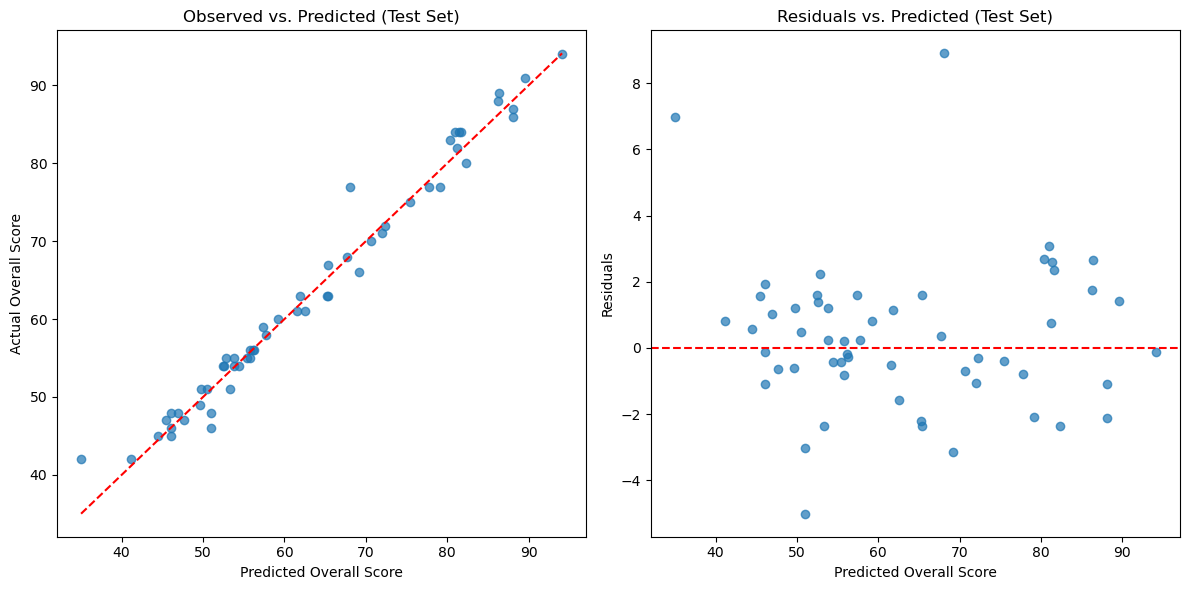

In [16]:
plt.figure(figsize=(12,6))      # do not change this line

plt.subplot(121)                # do not change this line
# 1. plot observations vs. predictions
plt.scatter(Y_test_pred, Y_test, alpha=0.7)
plt.plot([Y_test_pred.min(), Y_test_pred.max()], [Y_test_pred.min(), Y_test_pred.max()], 'r--')
plt.xlabel("Predicted Overall Score")
plt.ylabel("Actual Overall Score")
plt.title("Observed vs. Predicted (Test Set)")

plt.subplot(122)               # do not change this line
# 2. plot residual plot
residuals = Y_test - Y_test_pred
plt.scatter(Y_test_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Overall Score")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted (Test Set)")

plt.tight_layout()             # do not change this line


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

---

### Question 2c

Describe what the plots in part (b) indicate about this linear model. In particular, are the predictions good, and do the residuals appear uncorrelated with the predictions?

The observed vs. predicted plot shows that most predicted values are close to the actual overall scores, falling near the diagonal line Y=Y^. This indicates that the model performs reasonably well in capturing the overall trend, though there is some spread around the line, suggesting prediction errors for certain colleges.

In the residuals vs. predicted plot, the residuals appear fairly evenly scattered around zero, with no clear pattern or systematic curvature. This suggests that the residuals are approximately uncorrelated with the predictions, which is a good sign and supports the assumption of linearity and homoscedasticity in linear regression.

Overall, the model's predictions seem reasonably accurate, and the residual plot suggests that the assumptions of linear regression are not obviously violated.

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## 🤹 Question 3: Confidence Intervals and Regression Coefficients

We'll next analyze the statistical significance of coefficients in our linear model. Specifically, we will use bootstrapping to get $95\%$ confidence intervals on the fitted parameters. Each step of bootstrapping corresponds to one part of this question:

1. Question 3(a): Assume the sample is representative of the population from which it was drawn. To generate new, synthetic samples, we resample with replacement from the original sample. Generate `B` resamples.
2. Question 3(b): Calculate a statistic for each of the `B` resamples. Possible statistics are the mean (Lab 9), correlation (Lab 9), coefficients of a linear model (Question 3 below), or any function of the sample data.
3. Question 3(c): Construct a confidence interval by grabbing relevant percentiles of the `B` synthetic summary statistics. For example, for an 80% confidence interval, we grab the 10th and 90th percentiles.
4. Question 3(d): Use the resulting confidence interval to make inferences about the population-level statistic.

<br>

---

### Question 3a

Fill in the blanks below to implement the `bootstrap_sample()` function.

Specification:
- `bootstrap_sample()` returns a list of `B` bootstrap `DataFrame`s of the dataset `data`. 
- To generate a bootstrapped dataset from an actual dataset with $n$ rows, sample $n$ rows uniformly at random *with replacement* so that the bootstrapped `DataFrame` is the same size as the original `DataFrame`.

**Hint**: You may find `df.sample()` helpful, see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html). This is very similar to Lab 9.

In [17]:
def bootstrap_sample(data, B):
    """
    Performs bootstrap sampling on data to obtain B samples of size n.
    
    Arguments:
        data - Dataset contained as a pandas DataFrame 
        B - Number of randomly drawn samples
    
    Returns:
        samples - List containing B pandas DataFrames of size n each
                  corresponding to each sample  
    """
    samples = [data.sample(frac=1, replace=True, random_state=i) for i in range(B)]
    return samples

# Print out the first DataFrame only
bootstrap_sample(cleaned_college_data, 1)[0]

,Overall Score (0-100),Peer Assessment Score (1-5),Graduation and retention rank,Predicted 6yr graduation rate,Actual 6yr graduation rate,Pell gradrate,Social Mobility Rank,Percent of classes under 20,Percent of classes of 50 or more students,Student Excellence rank,...,Acceptance rate,Financial resources rank,Average alumni giving rate,Pell gradrate_missing,Social Mobility Rank_missing,Percent of classes under 20_missing,Percent of classes of 50 or more students_missing,First year students in top 10% of high school class_missing,Average alumni giving rate_missing,Is Public
47,71,2.6,32,85.0,88.0,71.87,110.491,77.0,1.0,56,...,36.0,16.0,14.0,True,True,False,False,True,False,0
117,51,2.6,90,69.0,72.0,65.00,158.000,66.0,1.0,109,...,86.0,89.0,13.0,False,False,False,False,False,False,0
67,63,3.4,109,80.0,66.0,64.00,135.000,98.0,0.0,71,...,61.0,67.0,21.0,False,False,False,False,False,False,0
103,55,2.8,100,76.0,71.0,67.00,164.000,79.0,0.0,105,...,80.0,72.0,15.0,False,False,False,False,False,False,0
9,89,4.3,6,93.0,94.0,88.00,147.000,64.0,3.0,10,...,22.0,7.0,33.0,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,42,2.4,151,60.0,65.0,59.00,40.000,78.0,1.0,151,...,71.0,187.0,8.0,False,False,False,False,True,False,0
149,45,2.5,136,59.0,68.0,55.00,22.000,54.0,0.0,166,...,76.0,153.0,17.0,False,False,False,False,False,False,0
110,53,3.0,114,66.0,71.0,69.00,65.000,58.0,0.4,95,...,49.0,140.0,12.0,False,False,False,False,False,False,0
25,81,4.0,29,91.0,88.0,91.00,183.000,75.0,0.0,19,...,14.0,19.0,18.0,False,False,False,False,False,False,0


In [18]:
grader.check("q3a")

q3a results: All test cases passed!

<br>

---

### Question 3b

Write a new function `generate_models()` with the following specifications:

1. Generate 1000 bootstrapped samples from an inputted `DataFrame` called `original_df`. `bootstrap_sample()` will come in handy.
2. For each of the 1000 bootstrapped samples, use `sklearn` to fit a linear regression model (with an intercept term) like we did in Question 2. `Overall Score (0-100)` is the response, and the rest of the columns are features. You should fit 1000 models in total. 
3. Store each of the 1000 trained models in a list called `models`. Return `models`.

**Hints:**
* You __should not__ create any validation or testing sets in this subpart; each model should fit to one entire bootstrapped `DataFrame`.
* `LinearRegression` is an object type; to store a new model, you must create a new `LinearRegression` instance first!
* Do not use `X` and `Y` as variable names while bootstrapping, as this will override the values stored in `q2a`.
* When fitting each model, remember that your design matrix should be a 2D array or a `pandas` `DataFrame`, whereas the true labels should be a `Series`.

**Note:** This question may take a few seconds to run due to the number of models being fit. 

In [19]:
np.random.seed(42) # DO NOT REMOVE THIS LINE

def generate_models(original_df):
    datasets =  bootstrap_sample(original_df, 1000)
    models = []

    feature_cols = original_df.drop(columns=['Overall Score (0-100)']).columns

    for df in datasets:
        features = df[feature_cols]
        target = df['Overall Score (0-100)']
        model = lm.LinearRegression()
        model.fit(features, target)
        models.append(model)
    
    # Datasets take up a lot of memory, so we should remove them!
    del datasets
    return models

# Generate the 1000 models
full_feature_models = generate_models(cleaned_college_data)


In [20]:
grader.check("q3b")

q3b results: All test cases passed!

<br>

---

### Question 3c

Complete the `confidence_interval` function below so that it generates a $95\%$ confidence interval for each of our $p+1$ parameters in the original linear model, including the intercept term $\theta_0$. 

Note: All of the helper code needed to extract coefficients from a list of trained models has been implemented for you.

**Hint**: 
- For a refresher on confidence intervals, refer to this section in the [Data 8 textbook](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html). 
- Pay close attention to how the arrays used below are formatted. What does each row represent? What does each column represent? To get the $i^{th}$ column from a 2D-array, you can use `2D_array[:, i]`.


In [21]:
def extract_coefs(models, include_intercept = True):
    """
    NOTE: This function has already been implemented. You do not need to modify this!
    
    Extracts coefficients of all the linear regression models in MODELS and returns
    it as a NumPy array with each model's coefficients as one row.
    
    Arguments:
        models - Contains k sklearn LinearRegression models, each with p + 1 coefficients.
        include_intercept - Whether to include an intercept in returned coefficients.
    
    Returns:
        coef_array - Coefficients of all k models, each with p + 1 coefficients (if intercept
                     enabled, otherwise p). The returned object is k x (p + 1) NumPy array.
    """
    coef_array = np.zeros(shape = (len(models), len(models[0].coef_) + 1))
    for i, m in enumerate(models):
        coef_array[i, 0] = m.intercept_
        coef_array[i, 1:] = m.coef_
    if include_intercept:
        return coef_array 
    return coef_array[:, 1:]

def confidence_interval(coefs):
    """
    Calculates confidence intervals for each theta_i based on coefficients of 
    bootstrapped models. Returns output as a list of confidence intervals.
    
    Arguments:
        coefs - Output of extract_coefs, a k x (p + 1) or k x p NumPy array containing
                coefficients of bootstrapped models.
    
    Returns:
        cis - Confidence intervals of each parameter theta_i in the form of a 
              list like this: [(0.5, 0.75), (0.2, 0.4), ...].
    """
    cis = []
    
    # FILL IN CODE BELOW
    for i in range(coefs.shape[1]):
        theta_i_values = coefs[:, i]
        theta_i_lower_ci, theta_i_upper_ci = np.percentile(theta_i_values, 10), np.percentile(theta_i_values, 90)
        cis.append((theta_i_lower_ci, theta_i_upper_ci))
    
    return cis


# Compute confidence intervals
np.random.seed(42) # DO NOT REMOVE THIS LINE
full_feature_models_coefs = extract_coefs(full_feature_models)
full_feature_cis = confidence_interval(full_feature_models_coefs)

In [22]:
grader.check("q3c")

q3c results: All test cases passed!

<br>

---

### Question 3d
Using the code you have written above, we'll now compute the confidence intervals for the coefficients of two different linear models: Model A and Model B. 

- Recall that Model A uses all features, as defined in `full_feature_models`.

- Model B uses a subset of features. The code below will help you fit Model B's coefficients and compute confidence intervals for them. Instances of Model B will be contained in `partial_feature_models`:

**Note**: Depending on your implementation of `generate_models` and whether you ignore particular columns in that function, you may need to change the input of `generate_models`. You can use the sanity check below to test whether your `partial_feature_models` were built with the correct features.

In [23]:
model_b_features = [
     "Peer Assessment Score (1-5)",
     "Acceptance rate"
]
partial_feature_models = generate_models(
    cleaned_college_data[["Overall Score (0-100)"] + model_b_features]
)
partial_feature_models_coefs = extract_coefs(partial_feature_models)
partial_feature_cis = confidence_interval(partial_feature_models_coefs)

In [24]:
# For a sanity check, the following lines of code should all output True
print("Coefficient shape is correct:", partial_feature_models_coefs.shape == (1000, 3))
print("Model input feature names are correct:", (partial_feature_models[0].feature_names_in_ == model_b_features).all())

Coefficient shape is correct: True
Model input feature names are correct: True


Here's a function that allows us to inspect the confidence interval of each model:

In [25]:
def print_confidence_intervals(models, cis):
    display(Markdown('##### Confidence Intervals:'))
    md_list = ["|parameter|feature name|lower|upper|",
               "----|----|----|----|"]
    coef_names = np.append(['Intercept'], models[0].feature_names_in_)
    md_list += [r"|$\theta_{" + str(i) + "}" + fr"$|{f_name}|{np.round(lci, 3)}|{np.round(uci, 3)}|" for i, ((lci, uci), f_name) in enumerate(zip(cis, coef_names))]
    display(Markdown('\n'.join(md_list)))

<!-- BEGIN QUESTION -->

#### Question 3d(i)
Let us first interpret **Model B**, the linear regression model that use a subset of features from our dataset.

In [26]:
display(Markdown('#### Model B: Subset of Features'))
print_confidence_intervals(partial_feature_models, partial_feature_cis)

#### Model B: Subset of Features

##### Confidence Intervals:

|parameter|feature name|lower|upper|
----|----|----|----|
|$\theta_{0}$|Intercept|1.769|24.2|
|$\theta_{1}$|Peer Assessment Score (1-5)|15.399|20.148|
|$\theta_{2}$|Acceptance rate|-0.207|-0.09|

Are $\theta_1$ and $\theta_2$ significantly different than 0? How do you know? 

Does your answer imply that the relationship between `Overall Score (0-100)`, `Peer Assessment Score (1-5)`, and `Acceptance rate` are causal? Do you think the relationships are causal? Explain.

Yes, both $\theta_1$ (Peer Assessment Score) and $\theta_2$ (Acceptance Rate) are significantly different from 0.
We know this because:
    The confidence interval for $\theta_1$ is [15.399, 20.148], which does not include 0. This implies a statistically significant positive relationship between peer assessment score and overall score.
  The confidence interval for $\theta_2$ is [-0.207, -0.09], which also does not include 0. This indicates a statistically significant negative relationship between acceptance rate and overall score.
No, statistical significance does not imply causality. The relationships between overall score and features like peer assessment score or acceptance rate may be driven by underlying confounding variables (e.g., prestige, historical reputation, funding levels, etc.).

In observational data like this, we can't control for all possible confounders or establish temporal order, so we should be cautious in interpreting these results as causal.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 3d(ii)

In what situation(s) would you prefer a more compact model with just key features, like Model B? On the other hand, in what situation(s) would you want to consider many features, like in Model A? Explain your answer to both of these questions.

We’d want to use a simpler model like Model B when we care about keeping things understandable and efficient. For example, if we’re presenting results to a non-technical audience, it’s much easier to explain how just two features affect the outcome. It’s also useful when collecting data is costly or time-consuming — fewer features means less effort and fewer resources needed.

On the other side, a more complex model like Model A makes sense when your main goal is accuracy and you have access to a lot of data. By including more features, you can often capture more of the real-world complexity and improve predictions. This is especially helpful if you're building a tool that prioritizes performance over simplicity.

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## ⚖️ Question 4: Performing Bias-Variance Analysis

This question will guide you through the concepts of model bias and model variance.

Recall that the **model variance** on a particular data point ($\vec{x_k}$) is the variance of the model predictions for $\vec{x_k}$ across parallel universes of randomly sampled training datasets:

$$\text{model variance} = \mathrm{Var}(\hat{Y}(\vec{x_k})) = \mathrm{Var}(\vec{x_k}^T\hat{\theta})$$

> Note that $\hat{Y}(\vec{x_k})$ is an alternative way to write $\hat{f}(\vec{x_k})$ from lecture.

To estimate the model variance, we can sample a particular data point $(\vec{x_k}, y_k)$ and calculate the variance of the predictions for $(\vec{x_k}, y_k)$ across parallel sampling universes, where each universe has a model fit to a randomly sampled training dataset. 

- As it turns out, you already have these fitted models stored in `models`!

-  Note that the variance is computed across the different models, which have the same shared structure (i.e., the same input features and transformations). However, fitted parameter values will differ across models since the training data differs across models.

Recall that **model risk** for a single point is the same as the mean squared error (MSE) of $\vec{x_k}$ over our parallel universes of fitted models:

$$
\text{model risk} = \mathbb{E}\left[\left(y_k - \hat{Y}(\vec{x_k}) \right)^2\right] \approx \frac{1}{\# \text{ of bootstrap}}\sum_{j=1}^{\# \text{ of bootstrap}} (y_k - \hat{Y}_j(\vec{x_k}))^2 = MSE(\vec{x_k})
$$

where the subscript $j$ is used to index the different models. 

We can also compute the ratio of model variance to model risk:

$$
\frac{\text{model variance}}{\text{model risk}}=\frac{\mathrm{Var}(\hat{Y}(\vec{x_k}))}{\mathbb{E}\left[\left(y_k - \hat{Y}(\vec{x_k}) \right)^2\right]}
$$

This ratio provides a sense of how much of model risk can be attributed to model variance, relative to squared bias and irreducible error ($\sigma^2$). You may find it helpful to recall the bias-variance decomposition from lecture:

$$
\text{model risk} = \sigma^2 + (\text{model bias})^2 + \text{model variance}
$$

where $\sigma^2$ is the observational variance, or "irreducible error".

<br>

---

### Question 4a

The function `simulate()` below takes in a single data point `xk`, `yk` and a list of models `models`.

- `xk` is a list of feature values for a single data point. `yk` is the scalar outcome.

`simulate()` function should return three quantities: the estimated model risk (`model_risk`), the estimated model variance (`model_var`), and the ratio of model variance to model risk (`ratio`).

We have left one line blank for you to fill in:

```model_risk, model_var, ratio = ...```

Fill in the line correctly to complete the function `simulate`:

In [31]:
def simulate(xk, yk, models):
    mystery_a = [model.predict([xk])[0] for model in models]
    mystery_b = np.var(mystery_a)
    mystery_c = np.mean((mystery_a - yk) ** 2)
    mystery_d = mystery_b / mystery_c
    model_risk, model_var, ratio = simulate(x_last, y_last, models)
    return model_risk, model_var, ratio

In [ ]:
grader.check("q4a")

<!-- BEGIN QUESTION -->

<br>

---

### Question 4b

Using the `simulate` function from above, we can compute the model risk, model variance, and variance-to-risk ratio of **Model B**:

In [29]:
x_last = X.iloc[X.shape[0] - 100]
y_last = Y.iloc[X.shape[0] - 100]

(
    partial_feature_model_risk,
    partial_feature_model_var,
    partial_feature_model_ratio
) = simulate(x_last[model_b_features], y_last, partial_feature_models)

print('Model B risk:')
print(partial_feature_model_risk)

print('Model B variance:')
print(partial_feature_model_var)

print('Model B ratio:')
print(partial_feature_model_ratio)

Model B risk:
2.493347485161267
Model B variance:
0.27449971448852684
Model B ratio:
0.11009284350543401


Comment on the variance-to-risk ratio for Model B (`partial_feature_ratio`).

- Does the model variance appear to be the dominant term in the bias-variance decomposition? If not, what term(s) dominate the bias-variance decomposition?

Then, given your conclusion above, describe what operation(s) you might perform to reduce the model risk.

The variance-to-risk ratio for Model B is 0.11, which is quite low. This tells us that only a small portion of the model’s total risk comes from variance. In other words, variance isn’t the problem here — the bigger issue is bias.

Since bias seems to be the dominant term, that means the model is likely underfitting — it’s either too simple or missing important information. To reduce the overall model risk, I’d consider adding more relevant features, using a more flexible model, or adjusting regularization if it’s too strong. The goal is to help the model better capture the patterns in the data without overfitting.


<!-- END QUESTION -->

<br><br>


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 6!

Here are some staff pets :) Can you find their names? There are two ways you can find it on JupyterLab.

<img src="images/mango.jpg" width="200px"/> <img src="images/sage.jpg" width="161px" /> <img src="images/Pishi.jpg" width="200px" />


### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSenPfvkr0iHmkxD0v4bjEyo1iH2g0znEYe-OEkShrJikFkFfg/viewform?usp=sf_link). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 6 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 6 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

**Important**: Please check that your **plots/graphs and written responses** were generated and submitted correctly to the HW 6 Written Assignment.

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 6 written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline. 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [30]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q2a results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!

    q3c results: All test cases passed!

    q4a results:
        q4a - 1 result:
            ❌ Test case failed
            Trying:
                x_test_ = X.iloc[-1]
            Expecting nothing
            ok
            Trying:
                y_test_ = Y.iloc[-1]
            Expecting nothing
            ok
            Trying:
                test_4a_model_risk, test_4a_model_var, test_4a_model_ratio = simulate(x_test_, y_test_, full_feature_models)
            Expecting nothing
            ok
            Trying:
                bool(test_4a_model_risk <= 0.5)
            Expecting:
                True
            ***********************